In [ ]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import norm

In [ ]:
def euclidean(x1, x2) : 
  return np.sqrt(np.sum((x1-x2)**2))

## TRAIN DATASET

In [ ]:
data_train = pd.read_excel("https://github.com/AkbarFauzy/Machine-Learning-Dataset/blob/main/kendaraan_train%20(1).xlsx?raw=true")
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

# TEST DATASET

In [ ]:
data_test = pd.read_excel("https://github.com/AkbarFauzy/Machine-Learning-Dataset/blob/main/kendaraan_test.xlsx?raw=true")
# data_test = data_test.drop(['Kode_Daerah', 'Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Jenis_Kelamin', 'SIM', 'Tertarik'], axis=1)
data_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,41,1,0,0,1-2 Tahun,Pernah,2630,78,20,0
47635,Pria,39,1,0,0,1-2 Tahun,Pernah,2630,124,200,0
47636,Pria,33,1,0,1,< 1 Tahun,Tidak,2630,152,152,0
47637,Wanita,71,1,0,0,1-2 Tahun,Pernah,2630,25,226,0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
data_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

# PREPOCESSING DATA

# NEW DATASET

In [ ]:
# Mengabungkan data_train dan data_test
new_data = pd.concat([data_train, data_test])
# Drop data yang bersifat kategori karena model menggunakan kmeans dimana membutuhkan data numerik untuk dihitung jarak antar datanya
new_data = new_data.drop(['id', 'Tertarik','Jenis_Kelamin', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Kode_Daerah', 'SIM', 'Umur_Kendaraan','Kanal_Penjualan'],axis=1)
new_data

,Umur,Premi,Lama_Berlangganan
0,30.0,28029.0,97.0
1,48.0,25800.0,158.0
2,21.0,32733.0,119.0
3,58.0,2630.0,63.0
4,50.0,34857.0,194.0
...,...,...,...
47634,41.0,2630.0,20.0
47635,39.0,2630.0,200.0
47636,33.0,2630.0,152.0
47637,71.0,2630.0,226.0


In [ ]:
#Informasi Dataframe
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               319256 non-null  float64
 1   Premi              318901 non-null  float64
 2   Lama_Berlangganan  319478 non-null  float64
dtypes: float64(3)
memory usage: 10.2 MB


In [ ]:
# Mengecek jumlah data yang null pada setial kolom
new_data.isnull().sum()

Umur                 14214
Premi                14569
Lama_Berlangganan    13992
dtype: int64

## PENGISIAN DATA YANG HILANG

In [ ]:
# Mengisi data null dengan mean dari setiap kolom
new_data = new_data.fillna(new_data.mean())
new_data.head()

,Umur,Premi,Lama_Berlangganan
0,30.0,28029.0,97.0
1,48.0,25800.0,158.0
2,21.0,32733.0,119.0
3,58.0,2630.0,63.0
4,50.0,34857.0,194.0


In [ ]:
#Mengecek kembali data yang kosong pada setiap kolom
new_data.isna().sum()

Umur                 0
Premi                0
Lama_Berlangganan    0
dtype: int64

## KORELASI ANTAR VARIABEL

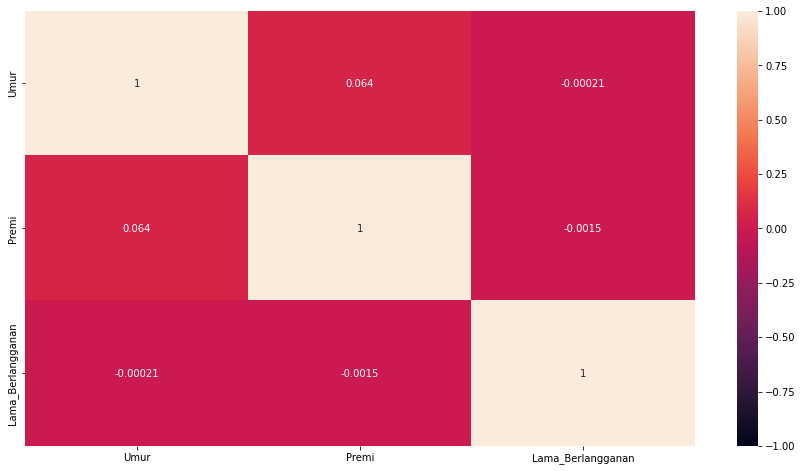

In [ ]:
#Korelasi antar Variabel di visualisasikan menggunakan heatmap
plt.figure(figsize=(15,8))
sns.heatmap(new_data.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
data = new_data

## DATA SCALING

In [ ]:
# Normalisasi menggunakan metode MinMax
def normalize(values):
  return (values - values.min())/(values.max() - values.min())
  
data_normalized = data.apply(normalize)
data_normalized

,Umur,Premi,Lama_Berlangganan
0,0.153846,0.047251,0.301038
1,0.430769,0.043104,0.512111
2,0.015385,0.056002,0.377163
3,0.584615,0.000000,0.183391
4,0.461538,0.059953,0.636678
...,...,...,...
47634,0.323077,0.000000,0.034602
47635,0.292308,0.000000,0.657439
47636,0.200000,0.000000,0.491349
47637,0.784615,0.000000,0.747405


In [ ]:
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               333470 non-null  float64
 1   Premi              333470 non-null  float64
 2   Lama_Berlangganan  333470 non-null  float64
dtypes: float64(3)
memory usage: 10.2 MB


In [ ]:
data_normalized.isna().sum()

Umur                 0
Premi                0
Lama_Berlangganan    0
dtype: int64

## REDUKSI DIMENSI MENGGUNAKAN METODE PCA (Principal Component Analysis)

In [ ]:
pca = PCA(n_components=2)
principal = pca.fit_transform(data_normalized)
df_pca = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.198229,-0.136147
1,0.012690,0.140847
2,-0.122029,-0.274484
3,-0.316108,0.294127
4,0.137238,0.171832
...,...,...
333465,-0.464751,0.032515
333466,0.158103,0.002094
333467,-0.007936,-0.090302
333468,0.247795,0.494433


In [ ]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca1    333470 non-null  float64
 1   pca2    333470 non-null  float64
dtypes: float64(2)
memory usage: 5.1 MB


In [ ]:
data_normalized.to_excel("Praprocessed Data.xlsx")

In [ ]:
df_pca.to_excel("PCA Data.xlsx")

# K-Means Functions

In [ ]:
class KMeans:
  def __init__(self, K, max_iteration =100):
    self.K = K
    self.max_iteration = max_iteration
    self.clusters = [[] for _ in range(self.K)]
    self.centroids = []

  # Fungsi Fit
  def fit(self, data):
    # Menyimpan Data
    self.data = data
    # Menyimpan banyaknya sample dan banyaknya feature
    self.n_samples, self.n_features = data.shape 
    #Inisialisasi centroid awal
    curr_centroids = self.initCentroids() 
    self.centroids = [self.data[idx] for idx in curr_centroids]

    for _ in range(self.max_iteration):
      # Membuat Clusters
      self.clusters = self.createClusters(self.centroids)
      # Meyimpan Centroids
      prevCentroids = self.centroids
      # Memperbaharui Centroids
      self.centroids = self.getCentroids(self.clusters)
      # Jika centroids converged(tidak ada berubah) Keluar dari perulangan
      if self.isConverged(prevCentroids, self.centroids):
        break
    # Kalkulasi SSE
    return self.calculateSSE(self.data, self.getClustersLabel(self.clusters), self.centroids)

  # Komputasi SSE
  def calculateSSE(self, data, labels, centroids):
    distance = np.zeros(data.shape[0])
    for i in range(len(self.clusters)):
      distance[labels == i] = norm(data[labels == i] - centroids[i], axis=1)
    return np.sum(np.square(distance))

  # Inisialisasi Random Centroids
  def initCentroids(self):
    return np.random.choice(self.n_samples, self.K, replace=False)

  # Fungsi untuk mendapatkan label dari sebuah clusters
  def getClustersLabel(self, clusters):
    labels = np.empty(self.n_samples)
    for clusters_idx, cluster in enumerate(clusters):
      for data_idx in cluster:
        labels[data_idx] = clusters_idx
    return labels

  # Membuat Clusters
  def createClusters(self, centroids):
    # Membuat List berjumlah K
    clusters = [[] for _ in range(self.K)]
    for idx, data in enumerate(self.data):
      # Dapatkan id centroid terdekat
      centroid_idx = self.closestCentroid(data, centroids)
      # Assign index ke clusters terdekat
      clusters[centroid_idx].append(idx)
    #return Clusters  
    return clusters

  # Euclidean Distance dan mengembalikan distance terpendek
  def closestCentroid(self, data, centroids):
    return np.argmin([euclidean(data, point) for point in centroids])

  # Fungsi untuk mendapatkan Centroids Baru
  def getCentroids(self, clusters):
    centroid = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      clusters_mean = np.mean(self.data[cluster], axis=0)
      centroid[cluster_idx] = clusters_mean
    return centroid
  
  # Fungsi boolean untuk mengecek apakah centroids converged
  def isConverged(self, prevCentroids, centroids):
    distance =  distances = [euclidean(prevCentroids[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0
  
  # Fungsi Plot
  def plot(self,xlabel,ylabel):
    fig, ax = plt.subplots(figsize = (12,8))
    for i, index in enumerate(self.clusters):
      point = self.data[index].T
      ax.scatter(*point, s=40, label=i)

    for point in self.centroids:
      ax.scatter(*point, marker="X", color="black", linewidth=2)
    
    ax.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()



# EKSPLORASI

## VISUALISASI DATA

### Umur & Premi

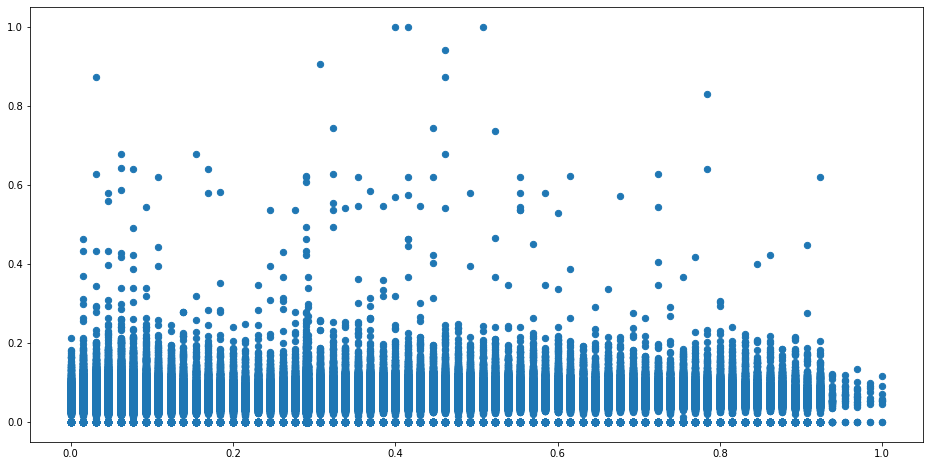

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data_normalized["Umur"], data_normalized["Premi"],s=40, cmap=plt.cm.Spectral)
plt.show()

### Lama Berlangganan & Premi

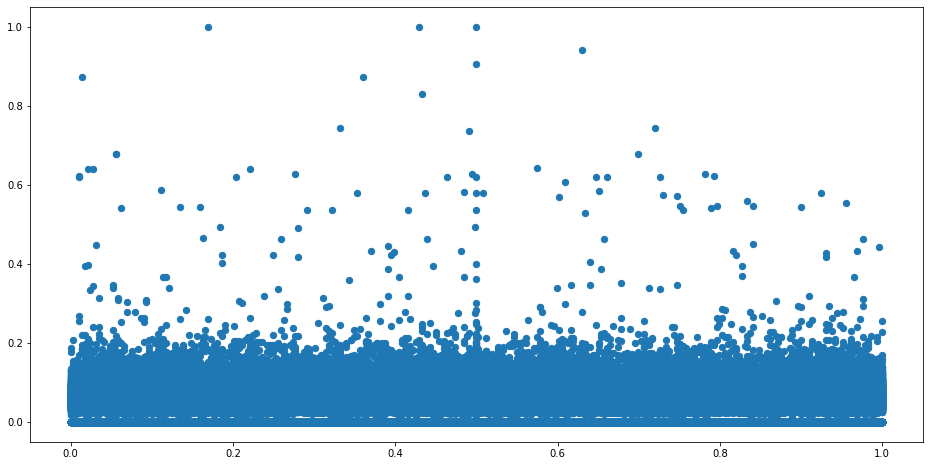

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data_normalized["Lama_Berlangganan"], data_normalized["Premi"],s=40, cmap=plt.cm.Spectral)
plt.show()

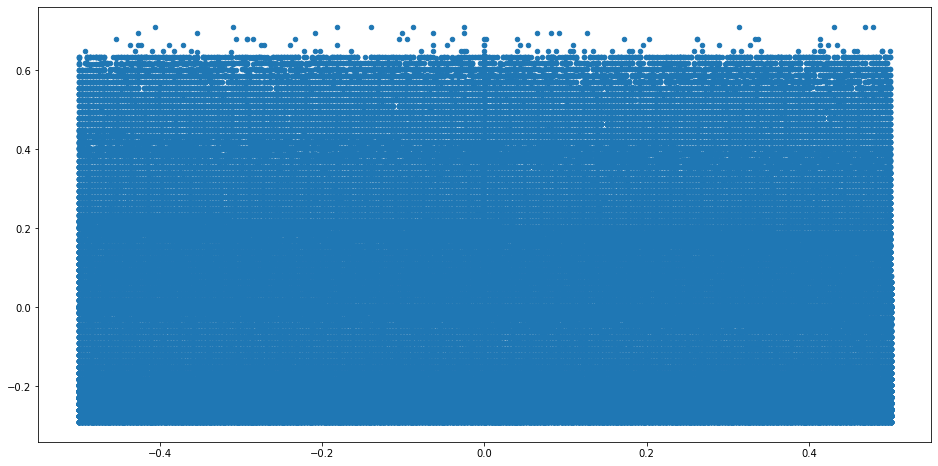

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(df_pca["pca1"], df_pca["pca2"],s=20, cmap=plt.cm.Spectral)
plt.show()

## MAIN PROGRAM

In [ ]:
data_test1 = data_normalized[['Umur','Premi']].to_numpy()
data_test2 = data_normalized[['Lama_Berlangganan','Premi']].to_numpy()
data_test3 = df_pca.to_numpy()

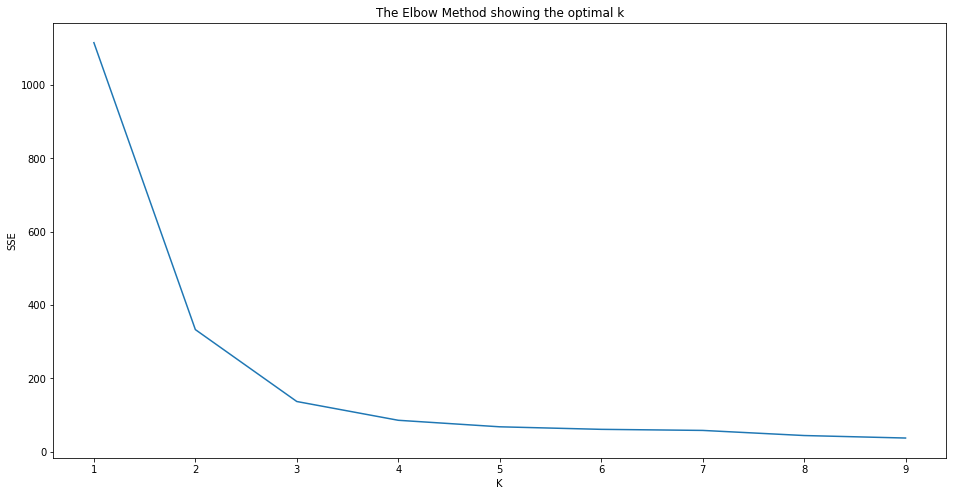

In [ ]:
sse_1 =[]
for i in range(1,10):
  kmeans_1 = KMeans(i,100)
  sse_1.append(kmeans_1.fit(data_test1[:20000])) # Mencoba 20000 data untuk mempercepat waktu komputasi 

plt.figure(figsize=(16,8))
plt.plot(range(1,10), sse_1)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

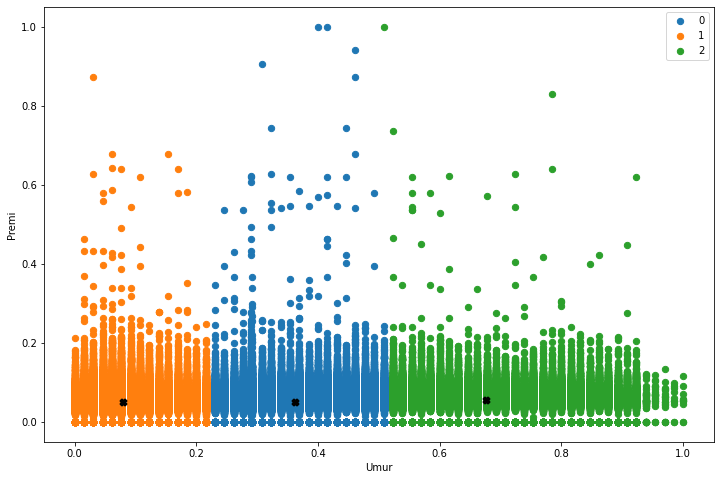

In [ ]:
kmeans_1 = KMeans(3, 100)
y_pred = kmeans_1.fit(data_test1)
kmeans_1.plot("Umur", "Premi")

In [ ]:
output = pd.DataFrame(kmeans_1.data, columns=['Umur', 'Premi'])
output['clusters'] = kmeans_1.getClustersLabel(kmeans_1.clusters)
output

,Umur,Premi,clusters
0,0.153846,0.047251,1.0
1,0.430769,0.043104,0.0
2,0.015385,0.056002,1.0
3,0.584615,0.000000,2.0
4,0.461538,0.059953,0.0
...,...,...,...
333465,0.323077,0.000000,0.0
333466,0.292308,0.000000,0.0
333467,0.200000,0.000000,1.0
333468,0.784615,0.000000,2.0


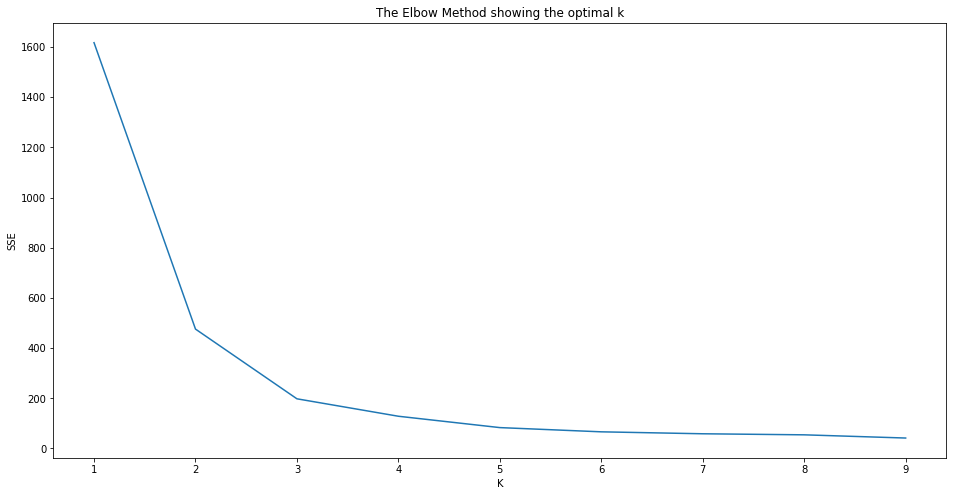

In [ ]:
sse_2 =[]
for i in range(1,10):
  kmeans = KMeans(i,100)
  sse_2.append(kmeans.fit(data_test2[:20000])) # Mencoba 20000 data untuk mempercepat waktu komputasi 

plt.figure(figsize=(16,8))
plt.plot(range(1,10), sse_2)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

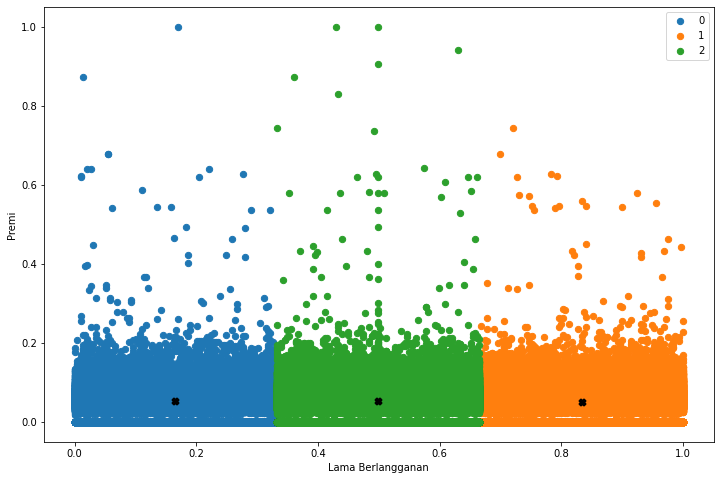

In [ ]:
kmeans_2 = KMeans(3, 100)
y_pred = kmeans_2.fit(data_test2)
kmeans_2.plot("Lama Berlangganan","Premi")

In [ ]:
output = pd.DataFrame(kmeans_2.data, columns=['Lama_Berlangganan','Premi'])
output['clusters'] = kmeans_2.getClustersLabel(kmeans_2.clusters)
output

,Lama_Berlangganan,Premi,clusters
0,0.301038,0.047251,0.0
1,0.512111,0.043104,2.0
2,0.377163,0.056002,2.0
3,0.183391,0.000000,0.0
4,0.636678,0.059953,2.0
...,...,...,...
333465,0.034602,0.000000,0.0
333466,0.657439,0.000000,2.0
333467,0.491349,0.000000,2.0
333468,0.747405,0.000000,1.0


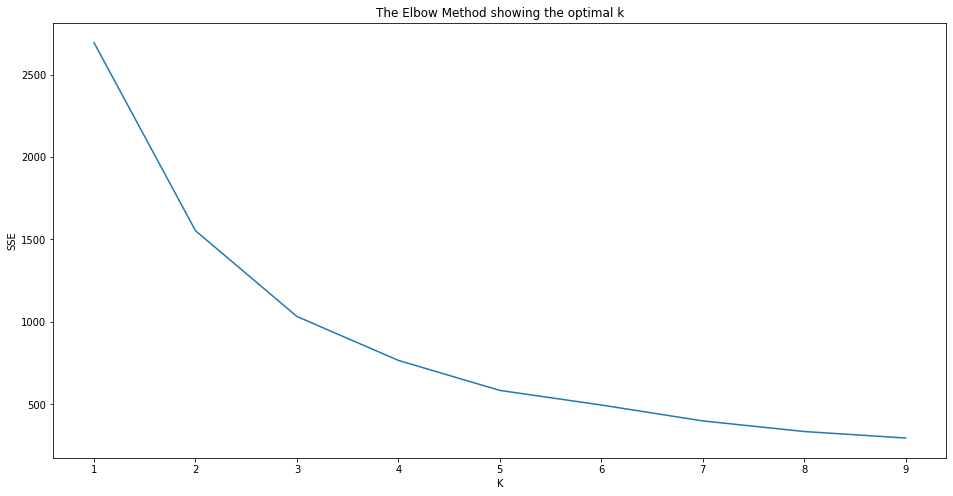

In [ ]:
sse_3 =[]
for i in range(1,10):
  kmeans = KMeans(i,100)
  sse_3.append(kmeans.fit(data_test3[:20000])) # Mencoba 20000 data untuk mempercepat waktu komputasi 

plt.figure(figsize=(16,8))
plt.plot(range(1,10), sse_3)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


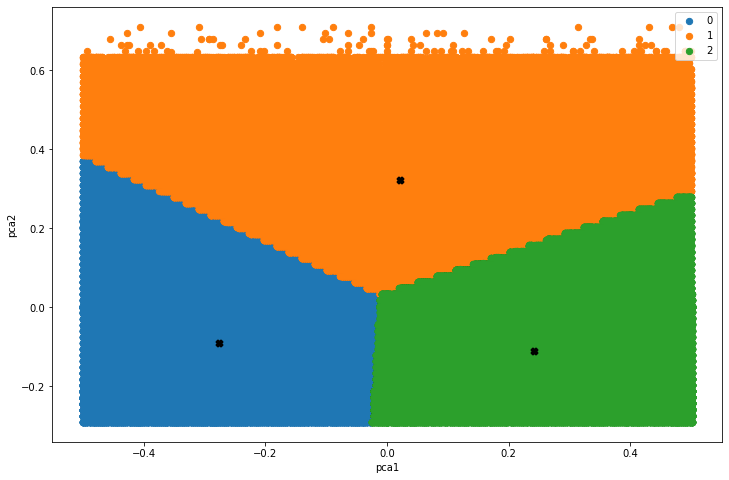

In [ ]:
kmeans_3 = KMeans(3, 100)
y_pred = kmeans_3.fit(data_test3) 
kmeans_3.plot("pca1", "pca2")

In [ ]:
output = pd.DataFrame(kmeans_3.data, columns=['pca1', 'pca2'])
output['clusters'] = kmeans_3.getClustersLabel(kmeans_3.clusters)
output

,pca1,pca2,clusters
0,-0.198229,-0.136147,0.0
1,0.012690,0.140847,0.0
2,-0.122029,-0.274484,0.0
3,-0.316108,0.294127,0.0
4,0.137238,0.171832,1.0
...,...,...,...
333465,-0.464751,0.032515,0.0
333466,0.158103,0.002094,1.0
333467,-0.007936,-0.090302,0.0
333468,0.247795,0.494433,1.0
